# Projeto 1

Alunos:

- Lucas Amin
- Rafael Toyomoto
- Willian Henrique

## Imports

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split

# Redução de dimensionalidade
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import linear_model, decomposition, datasets

## Functions

In [4]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12,10))
    cmap = sns.diverging_palette(220,10, as_cmap=True)
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={'shrink':.9}, 
        ax=ax, 
        annot=True, 
        annot_kws={'fontsize':12})

In [5]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df,row = row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

In [6]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

## Dataset
Carregando o dataset do titanic e observando os dados

In [7]:
#Adaptado de https://www.kaggle.com/sachinkulkarni/titanic/an-interactive-data-science-tutorial
# Caso esteja rodando no Colab
#from google.colab import files
#uploaded = files.upload()
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_full  = pd.concat([df_train, df_test], sort=True, ignore_index=True)

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Avaliar integridade

### Dataset de treino

In [10]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Renouf, Mr. Peter Henry",male,1601,G6,S
freq,1,577,7,4,644


**Considerações**

- É possível observar problemas com os campos "Age", "Cabin" e "Embarked" quanto a valores nulos
- A média de sobrevivência indica que a maioria das pessoas morreram
- Idade mínima ser 0,42 indica problema nos valores contidos nesse campo (?)
- Fare igual a 0 indica possível problema nesse campo (alguem entrou de graça)

### Dataset de teste

In [12]:
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
df_test.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Avaliar inconsistências
Ver registros com features nulas

In [14]:
print("Missing data counts in Training Data : ")
print(df_train.isnull().sum())

print("Missing data counts in Test Data : ")
print(df_test.isnull().sum())

print("Percentage of data missing Training Data: ")
print(df_train.isnull().sum()/df_train.shape[0])

print("Percentage of data missing Test Data: ")
print(df_test.isnull().sum()/df_test.shape[0])

Missing data counts in Training Data : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing data counts in Test Data : 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Percentage of data missing Training Data: 
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
Percentage of data missing Test Data: 
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex 

Avaliar se os ID dos passageiros estão certos

In [15]:
print("Train", df_train["PassengerId"].unique().size, "=", df_train.shape[0])
print("Test", df_test["PassengerId"].unique().size, "=", df_test.shape[0])

Train 891 = 891
Test 418 = 418


Ver labels das **features** categóricas

In [16]:
for label in ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]:
    print(label, df_train[label].unique())
#C = Cherbourg
#Q = Queenstown
#S = Southampton

Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


## Tratando os dados

In [17]:
train = df_train.copy()
test  = df_test.copy()

### Análise dos dados faltantes em grande volume

Cerca de 77% dos registros no **dataset de treino** e 78% no **dataset de teste** estão sem a informação de **Cabin**, sendo inevitável que esse atributo deverá ser ignorado.

Já para o atributo **Age**, em ambos **dataset** observamos uma taxa de valores faltando de 20%, aproximadamente, sendo possível tentar completar esses registros corrompidos.

In [18]:
train = train.drop(['Cabin'], axis=1)
test  = test.drop(['Cabin'], axis=1)

### Tratar o atributo Ticket

Ticket é apenas um nome, vamos ignorar o atributo que não vai ser útil para o treinamento

In [19]:
train = train.drop(['Ticket'], axis=1)
test  = test.drop(['Ticket'], axis=1)

### Tratar o atributo Fare

In [20]:
df_test[df_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Para o atributo **Fare** vamos completar com a média

In [21]:
test['Fare'] = df_test['Fare'].fillna(value=df_test['Fare'].mean(),axis=0)

### Tratar o atributo Embarked

In [22]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Para o atributo **Embarked** vamos completar com o valor mais comum

In [23]:
train['Embarked'] = df_train['Embarked'].fillna(value='S',axis=0)

### Tratar atributos Parch e SibSp

In [24]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
test['FamilySize']  = test['Parch'] + test['SibSp'] + 1

train = train.drop(['Parch', 'SibSp'], axis=1)
test  = test.drop(['Parch', 'SibSp'], axis=1)

### Tratar os nomes
Extrair "título" dos nomes das pessoas.

In [25]:
# Extrair todos os titulos do conjunto de treinamento
def extract_titles(df):
    pos = df.columns.get_loc('Name')
    titles = set({})
    for row in df.values:
        title = row[pos].split(',')[1].split('.')[0] + '.'.strip()
        titles.add(title)

    return titles

# Adicionar uma coluna nova de titulos para o conjunto de treinamento
def add_titles_to_df(df) :
    titles = extract_titles(df)
    pos = df.columns.get_loc('Name')
    title_list = []
    for row in df.values:
        for title in titles:
            if title in row[pos]:
                title_list.append(title)
                break
    df['Title'] = title_list
    return df

# Adicionar uma coluna com os titulos no conjunto de treinamentos
print(train)
add_titles_to_df(train)
add_titles_to_df(test)

train.head()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age     Fare  \
0                              Braund, Mr. Owen Harris    male  22.0   7.2500   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  71.2833   
2                               Heikkinen, Miss. Laina  female  26.0   7.9250   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  53.1000   
4                             Allen, Mr. William Henry    male  35.0   8.0500   
..                                                 ...   

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr.


Foi verificado que existem títulos com poucas entradas, o que pode indicar ruídos

In [26]:
train['Title'].value_counts()

 Mr.              517
 Miss.            182
 Mrs.             125
 Master.           40
 Dr.                7
 Rev.               6
 Mlle.              2
 Major.             2
 Col.               2
 Don.               1
 Mme.               1
 Jonkheer.          1
 Ms.                1
 Sir.               1
 the Countess.      1
 Lady.              1
 Capt.              1
Name: Title, dtype: int64

Combinando os titulos incomuns com os comuns

In [27]:
male_titles = [' Col.',' Major.',' Capt.',' Jonkheer.',' Don.',' Sir.']
female_titles = [' Lady.',' Mme.',' the Countess.',' Dona.',' Mlle.']

def replace_uncommon_titles(df,new_title,title_list):
    pos = df.columns.get_loc('Title')
    for title in title_list:
        for i in range(0,df.shape[0]):
            if df.iloc[i,pos] == title:
                print(title)
                df.iloc[i,pos] = new_title                
    return df

train = replace_uncommon_titles(train,' Mr.',male_titles)
train = replace_uncommon_titles(train," Miss.",female_titles)
test = replace_uncommon_titles(test," Mr.",male_titles)
test = replace_uncommon_titles(test," Miss.",female_titles)

# Checando os dados de cada titulo
titles = list(train['Title'].value_counts().index)
for title in titles:
    print("Title train:: ", title)
    print(train[train['Title'] == title].describe()["Age"])
    print("Title test:: ", title)
    print(test[test['Title'] == title].describe()["Age"])

 Col.
 Col.
 Major.
 Major.
 Capt.
 Jonkheer.
 Don.
 Sir.
 Lady.
 Mme.
 the Countess.
 Mlle.
 Mlle.
 Col.
 Col.
 Dona.
Title train::   Mr.
count    406.000000
mean      32.740148
std       12.930425
min       11.000000
25%       23.000000
50%       30.000000
75%       39.750000
max       80.000000
Name: Age, dtype: float64
Title test::   Mr.
count    185.000000
mean      32.194595
std       11.891720
min       14.000000
25%       23.000000
50%       29.000000
75%       40.000000
max       67.000000
Name: Age, dtype: float64
Title train::   Miss.
count    151.000000
mean      22.066225
std       12.983121
min        0.750000
25%       14.750000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64
Title test::   Miss.
count    65.000000
mean     22.039846
std      10.593381
min       0.170000
25%      18.000000
50%      22.000000
75%      30.000000
max      45.000000
Name: Age, dtype: float64
Title train::   Mrs.
count    108.000000
mean      35.898148
st

### Tratando a idade (Age)
Utilizando os titulos para aproximar as idades faltantes

In [28]:
age_mean = train.groupby("Title").mean()['Age']

def fill_age_na(df,age_mean):
    rows_with_age_missing = df[df['Age'].isnull()]
    pos = df.columns.get_loc("Age")
    for title in age_mean.index:
        passengerIds = rows_with_age_missing[rows_with_age_missing['Title'] == title]["PassengerId"]
        for Id in passengerIds:
            df.iloc[df[df['PassengerId'] == Id].index.values,pos] = age_mean[title]
    return df

train = fill_age_na(train,age_mean)
test = fill_age_na(test,age_mean)

train[train['Age'].isnull()]
test[test['Age'].isnull()]
train.isnull().sum()
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
Title          0
dtype: int64

# Tratando atributos categóricos

Para o sexo, vamos apenas atribuir valor 1 para 'male' e 0 para 'female'

In [29]:
train["Sex_Code"] = np.where(train["Sex"] == 'male', 1, 0)
test["Sex_Code"]  = np.where(test["Sex"] == 'male', 1, 0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs.,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs.,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr.,1


In [30]:
#Cria uma nova variável para cada valor único de "Embarked" (no caso, Embarked_C  Embarked_Q  Embarked_S)
train["Embarked_C"] = np.where(train["Embarked"] == 'C', 1, 0)
test["Embarked_C"]  = np.where(test["Embarked"] == 'C', 1, 0)

train["Embarked_Q"] = np.where(train["Embarked"] == 'Q', 1, 0)
test["Embarked_Q"]  = np.where(test["Embarked"] == 'Q', 1, 0)

train["Embarked_S"] = np.where(train["Embarked"] == 'S', 1, 0)
test["Embarked_S"]  = np.where(test["Embarked"] == 'S', 1, 0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title,Sex_Code,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr.,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs.,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss.,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs.,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr.,1,0,0,1


## Visualização dos dados

### Matriz de correlação

- ID de passageiro (**PassengerId**) faz sentido não possuir grande correlação com as demais _features_;
- Todas _features_ com correlação alta com o campo **Survived** indica que será interessante para o treinamento;
- **Pclass** possui forte correlação com o valor da passagem (**Fare**), além de uma relação com **Age** e **Survived**;
- **Age** tem correlação com **SibSp** e **Parch**.

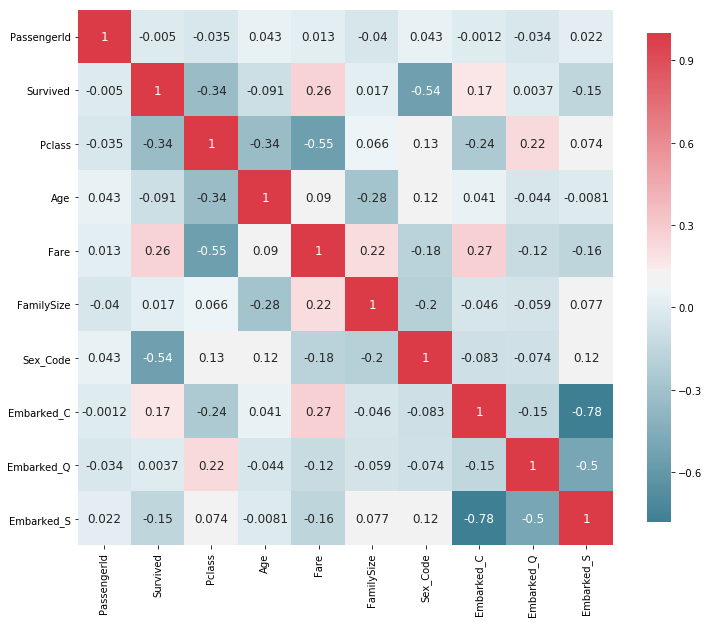

In [31]:
plot_correlation_map(train)

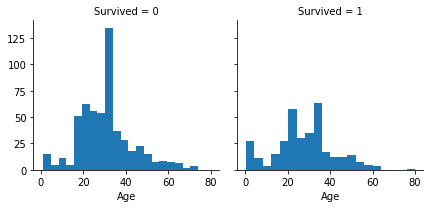

In [32]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

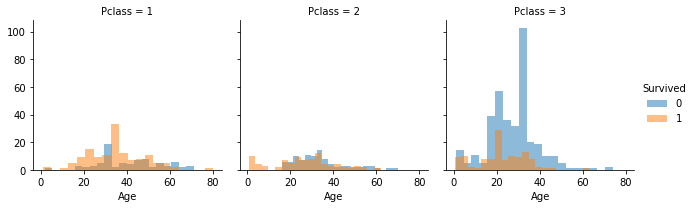

In [33]:
grid = sns.FacetGrid(train, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

c:\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\python\python37\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


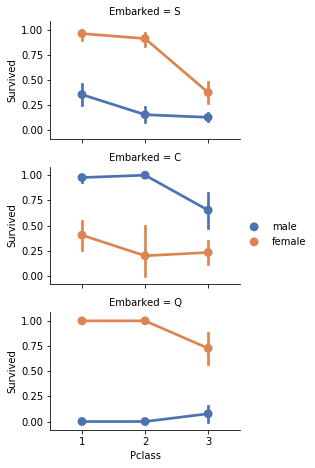

In [34]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

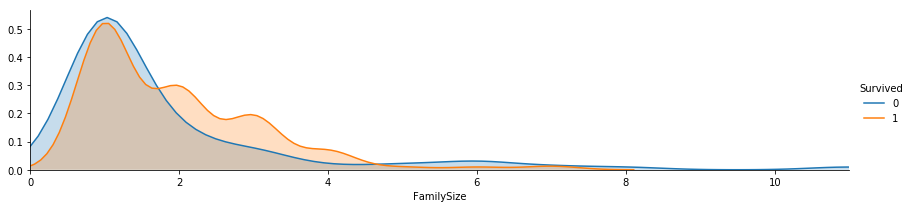

In [35]:
plot_distribution(train, var='FamilySize', target='Survived')

In [ ]:
plot_categories(df_train, cat='Embarked', target='Survived')
plot_categories(df_train, cat='Sex', target='Survived')
plot_categories(df_train, cat='Pclass', target='Survived')
plot_categories(df_train, cat='SibSp', target='Survived')
plot_categories(df_train, cat='Parch', target='Survived')
plot_categories(df_train, cat='FamilySize', target='Survived')

Vendo os gráficos, vamos apenas retirar os atributos categóricos que não fazem mais sentido pela criação

In [36]:
train = train.drop(["Embarked", "Name", "Title", "PassengerId", "Fare", "Sex"], axis=1)
train.head()

,Survived,Pclass,Age,FamilySize,Sex_Code,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,2,1,0,0,1
1,1,1,38.0,2,0,1,0,0
2,1,3,26.0,1,0,0,0,1
3,1,1,35.0,2,0,0,0,1
4,0,3,35.0,1,1,0,0,1


# Classificação

## Normalização

In [37]:
df_train_X = pd.DataFrame(train).drop(["Survived"], axis=1)
df_train_y = df_train["Survived"]

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Scale on full dataset to avoid train and test to be scaled differently
scaler.fit(train.drop(["Survived"], axis=1))
scaled_train = scaler.transform(df_train_X)
X = scaled_train
y = df_train_y.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## k-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Test best k
knn_cross_val_accuracies = {}
for k in range(1, 25):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_cv_scores = cross_val_score(knn_clf, X, y, cv=5)
    knn_cross_val_accuracies[k] = np.mean(knn_cv_scores)

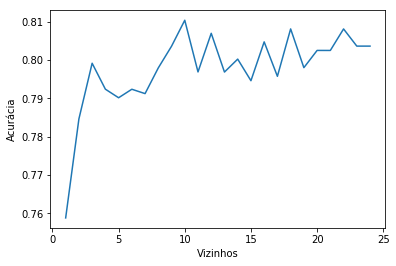

Melhor acurácia: 0.8103613145248204
Os melhores valores de K foram: [10]


In [40]:
plt.plot(list(knn_cross_val_accuracies.keys()), list(knn_cross_val_accuracies.values()), label='Cross validation')
plt.xlabel("Vizinhos")
plt.ylabel("Acurácia")
plt.show()

print("Melhor acurácia:", max(knn_cross_val_accuracies.values()))
print("Os melhores valores de K foram:", [key  for (key, value) in knn_cross_val_accuracies.items() if value == max(knn_cross_val_accuracies.values())])


Há pouca discrepância entre os melhores valores de k. Como não há grande impacto computacional em escolher um K maior, escolhe-se 10 como o número de vizinhos a se considerar.

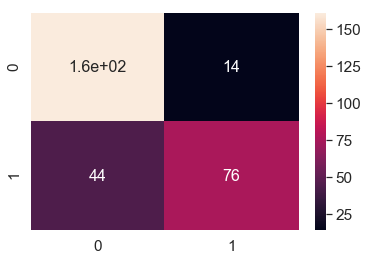

              precision    recall  f1-score   support

       Morto       0.79      0.92      0.85       175
        Vivo       0.84      0.63      0.72       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.80      0.80       295



In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

## Naive Bayes

Acurácia do Naive Bayes: 0.7634674547785216


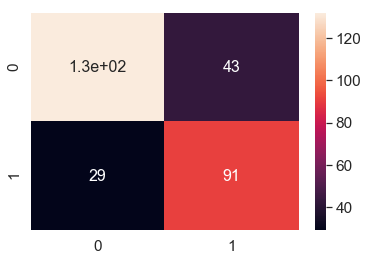

              precision    recall  f1-score   support

       Morto       0.82      0.75      0.79       175
        Vivo       0.68      0.76      0.72       120

    accuracy                           0.76       295
   macro avg       0.75      0.76      0.75       295
weighted avg       0.76      0.76      0.76       295



In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

print("Acurácia do Naive Bayes:", np.mean(cross_val_score(gnb, X_train, y_train, cv=5)))

gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

# Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

clf_rs = DecisionTreeClassifier()
param_dist = {"criterion": ["gini", "entropy"],
                  "min_samples_split": randint(5, 20),
                  "max_depth": [3],
                  "min_samples_leaf": randint(10, 20),
                  "max_leaf_nodes": randint(5, 20)}

clf_rs = RandomizedSearchCV(clf_rs, 
                            param_distributions=param_dist,
                            n_iter=5)

clf_rs.fit(X_train, y_train)

print("\nParâmetros e índices do melhor estimador encontrado:")
print(clf_rs.best_params_)
print(clf_rs.best_estimator_)

print("\nÍndices para todos os testes realizados pela RandomizedSearchCV():")
means = clf_rs.cv_results_['mean_test_score']
stds = clf_rs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
   
out = StringIO()
tree.export_graphviz(clf_rs.best_estimator_, out_file=out, class_names=["Morto", "Vivo"], filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
with open('irisDT-RS.png', 'wb') as f:
    f.write(graph.create_png())    
Image("irisDT-RS.png") 

c:\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



Parâmetros e índices do melhor estimador encontrado:
{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_samples_split': 9}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Índices para todos os testes realizados pela RandomizedSearchCV():
0.817 (+/-0.034) for {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 11, 'min_samples_split': 10}
0.819 (+/-0.037) for {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 9, 'min_samples_leaf': 13, 'min_samples_split': 8}
0.820 (+/-0.041) for {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 

InvocationException: GraphViz's executables not found

Dentre os parâmetros testados (alguns manualmente, alguns via RandomizedSearch), conclui-se que os parâmetros mais importantes são max_depth 3 e min_samples_leaf entre 10 e 20.

In [ ]:
dtc = clf_rs.best_estimator_
print("Acurácia da arvore de decisão:", np.mean(cross_val_score(dtc, scaled_train, df_train_y.tolist(), cv=5)))

dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Usando os mesmos parâmetros escolhidos para o Decision Tree
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=15, random_state=0)

print("Acurácia do Random forest:", np.mean(cross_val_score(rfc, X, y, cv=5)))

rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

# Análise

## Acurácia
- k-Nearest Neighbors: 0.81
- Naive Bayes: 0.77
- Decision Tree: 0.81
- Random Forest: 0.81

Não houve diferença significativa na acurácia propriamente dita dos classificadores com os parâmetros utilizados.

## Matriz de confusão
- k-Nearest Neighbors: 0.85 morto 0.72 vivo
- Naive Bayes: 0.79 morto 0.72 vivo
- Decision Tree: 0.85 morto 0.76 vivo
- Random Forest: 0.85 morto 0.72 vivo

F1-score indicou uma desvantagem do Naive Bayes com relação aos outros, o que indica que sua precisão e recall pode apresentar resultados piores tomando em conta um conjunto genérico de dados.

## Preprocessamento

A etapa de preprocessamento tornou possível a utilização de campos no formato String como o sexo e o atributo *Embarked* ao extrair esses campos para features binárias que os representam. Unindo essa operação com a utilização dos títulos presentes nos nomes para a estimativa da idade de linhas com o valor nulo, foi possível minimizar o impacto das inconsistências nos dados.

Com a análise do dataset também foi possível verificar campos que não apresentam influência na predição do salvamento dos passageiros, o que auxiliou na redução da maldição de dimensionalidade, aumentando também a performance dos classificadores.


# Utilizando PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=4, batch_size=6)

ipca.fit(X)

X_pca = ipca.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

### Random forest - PCA

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=15, random_state=0)

rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Acurácia do Random forest:", np.mean(cross_val_score(rfc, X_pca, y, cv=5)))

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

### K-nearest neighbors - PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Test best k
knn_cross_val_accuracies = {}
for k in range(1, 25):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
    knn_cross_val_accuracies[k] = np.mean(knn_cv_scores)
    
plt.plot(list(knn_cross_val_accuracies.keys()), list(knn_cross_val_accuracies.values()), label='Cross validation')
plt.xlabel("Vizinhos")
plt.ylabel("Acurácia")
plt.show()

print("Melhor acurácia:", max(knn_cross_val_accuracies.values()))
print("Os melhores valores de K foram:", [key  for (key, value) in knn_cross_val_accuracies.items() if value == max(knn_cross_val_accuracies.values())])

knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

### Naive Bayes - PCA

In [ ]:
gnb = GaussianNB()

print("Acurácia do Naive Bayes:", np.mean(cross_val_score(gnb, X_train, y_train, cv=5)))

gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

### Decision tree - PCA

In [ ]:
clf_rs = DecisionTreeClassifier()
param_dist = {"criterion": ["gini", "entropy"],
                  "min_samples_split": randint(5, 20),
                  "max_depth": [3],
                  "min_samples_leaf": randint(10, 20),
                  "max_leaf_nodes": randint(5, 20)}

clf_rs = RandomizedSearchCV(clf_rs, 
                            param_distributions=param_dist,
                            n_iter=5)

clf_rs.fit(X_train, y_train)

print("\nParâmetros e índices do melhor estimador encontrado:")
print(clf_rs.best_params_)
print(clf_rs.best_estimator_)

print("\nÍndices para todos os testes realizados pela RandomizedSearchCV():")
means = clf_rs.cv_results_['mean_test_score']
stds = clf_rs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
   
out = StringIO()
tree.export_graphviz(clf_rs.best_estimator_, out_file=out, class_names=["Morto", "Vivo"], filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
with open('irisDT-RS.png', 'wb') as f:
    f.write(graph.create_png())    
Image("irisDT-RS.png") 

In [ ]:
dtc = clf_rs.best_estimator_
print("Acurácia da arvore de decisão:", np.mean(cross_val_score(dtc, scaled_train, df_train_y.tolist(), cv=5)))

dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=None)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

print(classification_report(y_test, y_pred, target_names=["Morto", "Vivo"]))

### Análise do F1-score utilizando PCA no conjunto de dados

Sem PCA
- k-Nearest Neighbors: 0.85 morto e 0.72 vivo
- Naive Bayes: 0.79 morto e 0.72 vivo
- Decision Tree: 0.85 morto e 0.76 vivo
- Random Forest: 0.85 morto e 0.72 vivo

Utilizando PCA
- k-Nearest Neighbors: 0.84 morto e 0.72 vivo
- Naive Bayes: 0.81 morto e 0.73 vivo
- Decision Tree: 0.85 morto e 0.70 vivo
- Random Forest: 0.84 morto e 0.72 vivo

Houve mudanças relevantes apenas nos F1-scores dos classificadores de árvore de decisão,
que perderam performance ao utilizar PCA. Isso pode ser entendido como uma baixa performance 
dos parâmetros do PCA escolhido ou uma baixa correlação dos dados utilizados antes do PCA, 
o que faz com que haja perda de informação ao utilizar a decomposição.